# 0. Import Libraries and Read source data

In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
samples = pd.read_csv('./application_samples.csv')

In [8]:
features = pd.read_csv('./credit_features.csv')

In [9]:
data_dict = pd.read_csv('./data_dictionary.csv')

# 1. EDA

In [10]:
data_dict

,Name,Description
0,UID,unique identifier
1,Application Date,Date of loan application
2,Amount,Amount requested by applicant
3,Term,Repayment period requested by applicant
4,Employment Type,Stated employment
5,LoanPurpose,Purpose of loan
6,Success,Applicant successful
7,ALL_AgeOfOldestAccount,Age of oldest accounts
8,ALL_AgeOfYoungestAccount,Age of youngest accounts
9,ALL_Count,No. of accounts


In [11]:
samples.head()

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0


In [12]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UID              8847 non-null   int64 
 1   ApplicationDate  8847 non-null   object
 2   Amount           8847 non-null   int64 
 3   Term             8847 non-null   int64 
 4   EmploymentType   8847 non-null   object
 5   LoanPurpose      8847 non-null   object
 6   Success          8847 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 483.9+ KB


In [13]:
samples['UID'].nunique()

8847

In [14]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UID                                   8847 non-null   int64  
 1   ALL_AgeOfOldestAccount                8847 non-null   int64  
 2   ALL_AgeOfYoungestAccount              8847 non-null   int64  
 3   ALL_Count                             8847 non-null   int64  
 4   ALL_CountActive                       8847 non-null   int64  
 5   ALL_CountClosedLast12Months           8847 non-null   int64  
 6   ALL_CountDefaultAccounts              8847 non-null   int64  
 7   ALL_CountOpenedLast12Months           8847 non-null   int64  
 8   ALL_CountSettled                      8847 non-null   int64  
 9   ALL_MeanAccountAge                    8847 non-null   float64
 10  ALL_SumCurrentOutstandingBal          8847 non-null   int64  
 11  ALL_SumCurrentOut

In [15]:
# since this column has only one unique value across all rows.
# and it doesn’t provide any useful information for modeling, as it has no variability.
# Dropping it can simplify the dataset without losing any predictive power.
print(features['ALL_TimeSinceMostRecentDefault'].nunique())
features = features.drop(columns=['ALL_TimeSinceMostRecentDefault'])

1


In [16]:
features.describe()

,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_WorstPaymentStatusActiveAccounts
count,8.847000e+03,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8.847000e+03,8847.000000,8847.000000
mean,4.753101e+06,162.694021,8.587431,17.515316,9.258506,1.589691,1.380355,2.453487,8.231491,57.285159,5.416258e+04,12858.636148,2.057647
std,2.766232e+06,94.569878,13.081866,13.900171,4.896900,2.611921,2.749450,2.964837,11.419963,29.132180,1.074432e+05,17756.568825,3.139938
min,2.160090e+05,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,2.376933e+06,100.000000,2.000000,9.000000,6.000000,0.000000,0.000000,1.000000,2.000000,38.770000,3.396000e+03,2438.000000,0.000000
50%,4.463541e+06,151.000000,5.000000,15.000000,9.000000,1.000000,0.000000,2.000000,5.000000,53.120000,1.267000e+04,8336.000000,0.000000
75%,7.194733e+06,212.000000,10.000000,22.000000,12.000000,2.000000,2.000000,3.000000,10.000000,71.530000,6.171250e+04,17990.500000,7.000000
max,9.684478e+06,999.000000,258.000000,233.000000,43.000000,60.000000,23.000000,62.000000,215.000000,304.000000,4.004808e+06,581415.000000,7.000000


In [17]:
features['ALL_WorstPaymentStatusActiveAccounts'].nunique()

9

## 1-1. Generate Full_df merging application_samples & features

In [18]:
full_df = pd.merge(samples, features, on = 'UID')

In [19]:
full_df.head()

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_WorstPaymentStatusActiveAccounts
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0,162,17,18,12,0,0,0,6,70.94,68555,15019,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0,266,30,14,10,0,4,0,4,104.79,2209,2209,7
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0,90,52,4,2,0,1,0,2,68.25,5108,5108,7
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0,163,19,14,6,1,1,0,8,67.50,25738,25738,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0,129,2,38,19,4,9,8,19,56.45,5801,5801,7


In [20]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8847 entries, 0 to 8846
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UID                                   8847 non-null   int64  
 1   ApplicationDate                       8847 non-null   object 
 2   Amount                                8847 non-null   int64  
 3   Term                                  8847 non-null   int64  
 4   EmploymentType                        8847 non-null   object 
 5   LoanPurpose                           8847 non-null   object 
 6   Success                               8847 non-null   int64  
 7   ALL_AgeOfOldestAccount                8847 non-null   int64  
 8   ALL_AgeOfYoungestAccount              8847 non-null   int64  
 9   ALL_Count                             8847 non-null   int64  
 10  ALL_CountActive                       8847 non-null   int64  
 11  ALL_CountClosedLa

In [21]:
# There's no NaN value.
full_df.isna().sum()

UID                                     0
ApplicationDate                         0
Amount                                  0
Term                                    0
EmploymentType                          0
LoanPurpose                             0
Success                                 0
ALL_AgeOfOldestAccount                  0
ALL_AgeOfYoungestAccount                0
ALL_Count                               0
ALL_CountActive                         0
ALL_CountClosedLast12Months             0
ALL_CountDefaultAccounts                0
ALL_CountOpenedLast12Months             0
ALL_CountSettled                        0
ALL_MeanAccountAge                      0
ALL_SumCurrentOutstandingBal            0
ALL_SumCurrentOutstandingBalExcMtg      0
ALL_WorstPaymentStatusActiveAccounts    0
dtype: int64

In [22]:
full_df.head()

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_WorstPaymentStatusActiveAccounts
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0,162,17,18,12,0,0,0,6,70.94,68555,15019,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0,266,30,14,10,0,4,0,4,104.79,2209,2209,7
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0,90,52,4,2,0,1,0,2,68.25,5108,5108,7
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0,163,19,14,6,1,1,0,8,67.50,25738,25738,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0,129,2,38,19,4,9,8,19,56.45,5801,5801,7


# 2. Preprocessing - Feature Engineering

## Preprocessing Object type
ApplicationDate, EmploymentType and LoanPurpose need to be preprocessed since they are the object types which is inappropriate type when we use them as an input of machine learning.
- 1 'ApplicationDate' : Transform into datetime format, extract year, month, and day as separate columns, extract the day of the week and calculate the number of days since the application date to use all of them as features.
- 2 'EmploymentType' : Use one-hot encoding which is a basic encoding technique when we have a few unique values in categories
- 3 'LoanPurpose': Has more than 2,000 different unique values.


### 1. samples['ApplicationDate]

In [23]:
# Assuming `ApplicationDate` is in the 'DD/MM/YYYY' format
full_df['ApplicationDate'] = pd.to_datetime(full_df['ApplicationDate'], format='%d/%m/%Y')

In [24]:
# Extracting year, month, and day as separate columns
# we don't need year since it's just all 2020
# samples['ApplicationYear'] = samples['ApplicationDate'].dt.year
full_df['ApplicationMonth'] = full_df['ApplicationDate'].dt.month
full_df['ApplicationDay'] = full_df['ApplicationDate'].dt.day

# Extracting the day of the week (0=Monday, 6=Sunday)
full_df['ApplicationDayOfWeek'] = full_df['ApplicationDate'].dt.dayofweek

# Calculate the number of days since the application date
current_date = datetime.now()
full_df['DaysSinceApplication'] = (current_date - full_df['ApplicationDate']).dt.days

In [25]:
full_df.drop(columns=['ApplicationDate'], inplace= True)

### 2. ['EmploymentType]

In [26]:
full_df['EmploymentType'].value_counts()

Employed - full time    7714
Employed - part time     570
Self employed            418
Retired                  145
Name: EmploymentType, dtype: int64

In [27]:
full_df = pd.get_dummies(full_df, columns = ['EmploymentType'])
full_df.head()

,UID,Amount,Term,LoanPurpose,Success,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,...,ALL_SumCurrentOutstandingBalExcMtg,ALL_WorstPaymentStatusActiveAccounts,ApplicationMonth,ApplicationDay,ApplicationDayOfWeek,DaysSinceApplication,EmploymentType_Employed - full time,EmploymentType_Employed - part time,EmploymentType_Retired,EmploymentType_Self employed
0,4921736,2000,60,Unexpected bills,0,162,17,18,12,0,...,15019,0,7,3,4,1588,1,0,0,0
1,1241981,3000,60,Starting new bussniess,0,266,30,14,10,0,...,2209,7,2,4,1,1738,1,0,0,0
2,5751748,20000,60,Business capital,0,90,52,4,2,0,...,5108,7,8,2,6,1558,1,0,0,0
3,7163425,20000,60,New business venture,0,163,19,14,6,1,...,25738,0,9,23,2,1506,0,0,0,1
4,227377,5000,36,car,0,129,2,38,19,4,...,5801,7,1,1,2,1772,1,0,0,0


### 3. 'LoanPurpose'

In [ ]:
# We have more than 2,000 unique values of Loan Purpose, we need to categorize them.
full_df['LoanPurpose'].nunique()

In [ ]:
full_df['LoanPurpose'].value_counts()[:30]

In [28]:
# First of all, make all that in lower case since there are car, Car, home, Home...
full_df['LoanPurpose'] = full_df['LoanPurpose'].str.lower()

#### Tried TF-IDF Vectorization, but doesn't work well

In [269]:
# # TF-IDF
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))  # 2-grams
# X_tfidf = vectorizer.fit_transform(full_df['LoanPurpose'])

## Vectorization and Clustering
# number_of_cluster = 5
# X_tfidf = vectorizer.fit_transform(df['LoanPurpose'])
# kmeans = KMeans(n_clusters=number_of_cluster, random_state=42)
# df['LoanPurposeCluster'] = kmeans.fit_predict(X_tfidf)

In [272]:
# Get feature names from TF-IDF vectorizer
terms = vectorizer.get_feature_names()
# terms = vectorizer.get_feature_names_out()

# Display top terms for each cluster
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"\nCluster {i} top terms:")
    term_indices = np.argsort(center)[-10:]  # Get indices of top 10 terms
    top_terms = [terms[ind] for ind in term_indices]
    print(top_terms)


Cluster 0 top terms:
['house', 'loan', 'new car', 'furniture', 'new', 'debts', 'car', 'home improvements', 'home', 'improvements']

Cluster 1 top terms:
['decorated house', 'decorating', 'decorating home', 'decorating house', 'decorating vet', 'decking', 'çar tax insurance', 'home', 'improvement', 'home improvement']

Cluster 2 top terms:
['decorating', 'decorating home', 'decorating house', 'decorating vet', 'decorating vet bills', 'decor', 'çar tax insurance', 'consolidation', 'debt consolidation', 'debt']

Cluster 3 top terms:
['decorated house', 'decorating', 'decorating home', 'decorating house', 'decorating vet', 'decorating vet bills', 'decoration', 'dekory', 'çar tax insurance', 'car']

Cluster 4 top terms:
['decorated', 'decorated house', 'decorating', 'decorating home', 'decorating house', 'decorating vet', 'decorating vet bills', 'decking garden', 'çar tax insurance', 'consolidation']


#### So Why not Transformer

In [6]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

/Users/minjoo/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
# Generation of Embedding of Sentence-BERT model
transformer_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [72]:
loan_purpose_embeddings = transformer_model.encode(full_df['LoanPurpose'])

In [73]:
# KMeans Clustering
# It should be more than 8 as experimented
kmeans = KMeans(n_clusters=12, random_state=42)
full_df['LoanPurposeCluster'] = kmeans.fit_predict(loan_purpose_embeddings)

In [74]:
# Display sample texts from each cluster

num_clusters = full_df['LoanPurposeCluster'].nunique() 
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    cluster_texts = full_df[full_df['LoanPurposeCluster'] == cluster]['LoanPurpose'].sample(20, random_state=42)
    for text in cluster_texts:
        print(f"- {text}")


Cluster 0:
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation. holiday
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation & holiday
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation

Cluster 1:
- car purchase
- car
- new van, advertising
- car purchase
- car
- car
- car
- car
- car
- car
- a car
- car
- car
- car
- car
- to buy a new car
- used car
- van
- new car
- car

Cluster 2:
- credit cards
- paying credit card
- consolidate credit cards
- consolidate credit cards
- clear cards
- car and credit card
- home improvement and pay off credit card
- consoladate credit
- various things including clearing credit card
- pay credit cards
- credit cards
- repay credit cards
- credit card consolidation
- car and credit card
- credit card x2
- credit card payment
- pay credit card off
- credit cards
- credit card consolidation

In [78]:
# Show all texts in Cluster 0
cluster_0_texts = full_df[full_df['LoanPurposeCluster'] == 0]['LoanPurpose']
print(list(cluster_0_texts.unique()))

['car & consolidate', 'consolidation', 'consolidate dept', 'consolidate/flat deposit', 'consolidate', 'consolidation and car', 'r consolidation', 'dept consolidation', 'consolidatec', 'consolidated', 'consolidation of bills', 'consolídate', 'consolidation of finances', 'consolidation/car', 'consolidation/repairs', 'consolidation of a couple of bills', 'consolidation and travel', 'consolidation & studies', 'finance products consolidation', 'dept consolidate', 'bills and consolidation', 'traveling and consolidation', 'part consolidation', 'detb consolidation', 'consolidation to enable a move', 'bill consolidation', 'consolidation.', 'tools and consolidation', 'consolidate other depts', 'consolidate other loads', 'dent consolidation', 'consolidate bill', 'holiday and consolidation', 'glasses, consolidation', 'consolidation and other bits', 'car, consolidation', 'car and consolidation', 'consolidation and holiday', 'consolidation, holiday', 'holiday,car,consolidation', 'holiday & consolida

In [79]:
# One-hot encode the LoanPurposeCluster column
full_df = pd.get_dummies(full_df, columns=['LoanPurposeCluster'], prefix='Cluster')

In [80]:
# Now we don't need the actual LoanPurpose column, because we just categorized them.
full_df.drop(columns = ['LoanPurpose'], inplace = True)

In [ ]:
# End

# 3. Feature Selection - Using Techniques

In [81]:
full_df.drop(columns = ['UID'], inplace = True)

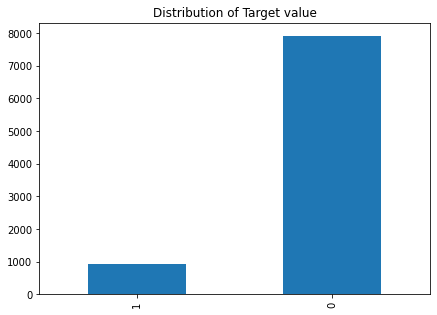

In [82]:
# shacorr
plt.figure(figsize = (7,5))
full_df.Success.value_counts().sort_values().plot(kind = 'bar')
plt.title('Distribution of Target value')
plt.show()

In [211]:
# Define X and y
X = full_df.drop(columns=['Success'])
y = full_df['Success']

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle = True,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)
# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Scale the data
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## 3-0. Define Baseline Model

### Generate class for efficiency

In [212]:
class ModelEvaluator:
    def __init__(self):
        self.graph_df = pd.DataFrame(columns = ['Method', 'f1_score', 'pr_auc_score'])

    def calculate_update_score(self, model, method, selected_features = X.columns):
        num_features = len(selected_features)

        sel_X_train = X_train_scaled[selected_features]
        sel_X_test = X_test_scaled[selected_features]

        model.fit(sel_X_train, y_train)

        y_pred = model.predict(sel_X_test)
        y_probs = model.predict_proba(sel_X_test)[:, 1]

        f1 = round(f1_score(y_test, y_pred, average = 'weighted'), 3)
        pr_auc = round(average_precision_score(y_test, y_probs), 3)

        print(f'{method}_n_features_{num_features}_f1_score :, {f1}')
        print(f'{method}_n_features_{num_features}_pr_auc_score : {pr_auc}')

        # Append results to the graph DataFrame
        self.graph_df = self.graph_df.append({
            'Method' : f'{method}_n_features_{num_features}',
            'f1_score' : f1,
            'pr_auc_score' : pr_auc
        }, ignore_index = True)

    def plot_scores(self):
        graph_df_long = self.graph_df.melt(id_vars = 'Method', var_name = 'Metric', value_name = 'Score')

        # Dynamically adjust the figure width based on the number of methods
        fig_width = max(8, len(self.graph_df['Method'].unique()) * 2)  # Ensures a minimum width of 8
        plt.figure(figsize=(fig_width, 6))

        # Plot with seaborn
        ax = sns.barplot(x = 'Method', y = 'Score', hue = 'Metric', data = graph_df_long)
        plt.title('Comparison of F1 score and PR-AUC score by method')
        plt.ylabel('Score')
        plt.xlabel('Method')
        plt.ylim(0,1)
        ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1))

        # Add values on top of each bar
        for container in ax.containers:
            ax.bar_label(container, fmt = '%.3f', padding = 3)

        plt.xticks(rotation = 45, ha = 'right')
        plt.tight_layout()
        plt.show()

In [213]:
evaluator = ModelEvaluator()

In [214]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
base_lr_model = LogisticRegression(random_state=42, max_iter=1000)  # max_iter increased for convergence

baseLR_n_features_34_f1_score :, 0.858
baseLR_n_features_34_pr_auc_score : 0.323


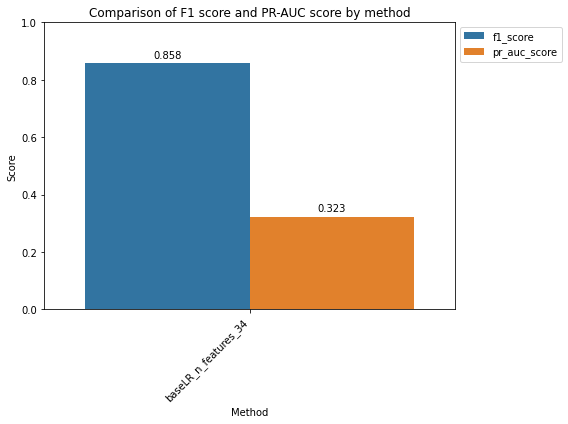

In [215]:
evaluator.calculate_update_score(base_lr_model, method = 'baseLR')
evaluator.plot_scores()

## 3-1. Variance Threshold

In [216]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled_minmax = scaler.fit_transform(X_train)

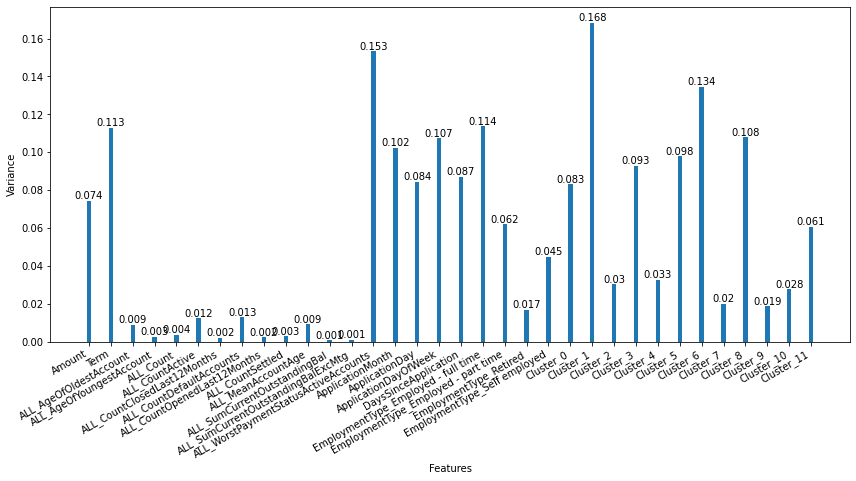

In [217]:
fig, ax = plt.subplots(figsize = (12,6))

x = X.columns
y = X_train_scaled_minmax.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
# ax.set_ylim(0, 0.1)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')

plt.tight_layout()
fig.autofmt_xdate()
plt.show()

In [218]:
var_threshold = 0.01
var_selected_cols = X.columns[[value > var_threshold for value in X_train_scaled_minmax.var(axis=0)]]
print(var_selected_cols)

Index(['Amount', 'Term', 'ALL_CountActive', 'ALL_CountDefaultAccounts',
       'ALL_WorstPaymentStatusActiveAccounts', 'ApplicationMonth',
       'ApplicationDay', 'ApplicationDayOfWeek', 'DaysSinceApplication',
       'EmploymentType_Employed - full time',
       'EmploymentType_Employed - part time', 'EmploymentType_Retired',
       'EmploymentType_Self employed', 'Cluster_0', 'Cluster_1', 'Cluster_2',
       'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7',
       'Cluster_8', 'Cluster_9', 'Cluster_10', 'Cluster_11'],
      dtype='object')


Variance threshold_n_features_25_f1_score :, 0.847
Variance threshold_n_features_25_pr_auc_score : 0.203


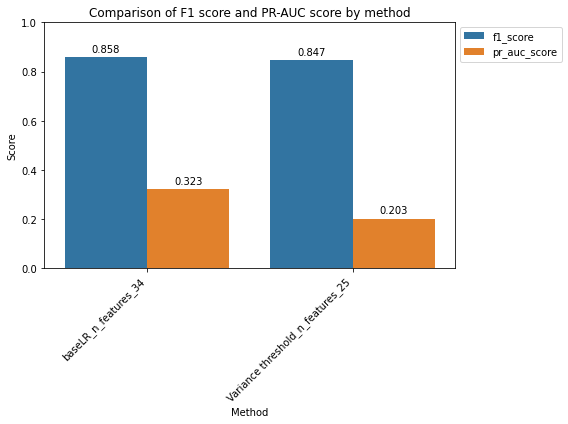

In [219]:
evaluator.calculate_update_score(base_lr_model, method = 'Variance threshold', selected_features=var_selected_cols)
evaluator.plot_scores()

After dropping some columns that has low variance, the f1 score and pr_auc score get low. so decided not to drop any columns from here.

## 3-2. Filter Methods - (1) Correlation

피처간의 상관계수가 0.8을 넘을 때, target 과의 상관계수가 높은 것을 살리고 하나는 drop.
target과의 상관계수 중에서 높은것 N 개 만 살리기

In [220]:
# Step 1: Calculate the correlation matrix using Pearson (or Spearman if desired)
correlation_matrix = full_df.corr(method='spearman')  # Or 'spearman'

# Step 2: Calculate correlation of each feature with the target
target_corr = full_df.corr()['Success'].abs().drop('Success')

# Step 3: Identify pairs of features with high inter-correlation
correlation_threshold = 0.8
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Step 4: For each pair of highly correlated features, drop the one with the lower correlation to the target
to_drop = set()  # Use a set to avoid duplicate entries
for column in upper_triangle.columns:
    high_corr_features = upper_triangle.index[upper_triangle[column].abs() > correlation_threshold].tolist()
    for feature in high_corr_features:
        # Compare correlation with the target and keep the more correlated feature
        if target_corr[feature] > target_corr[column]:
            to_drop.add(column)
        else:
            to_drop.add(feature)

# Drop the selected features from X_train
print(to_drop)
X_reduced = X.drop(columns=to_drop)

# Step 5: Select top `n` features with the highest absolute correlation to the target
n = 15  # Number of top features to keep
corr_selected_cols = target_corr.drop(index=to_drop).nlargest(n).index.tolist()

print("Selected features:", corr_selected_cols)

{'ApplicationMonth', 'ALL_Count', 'ALL_CountDefaultAccounts', 'ALL_CountSettled'}
Selected features: ['ALL_WorstPaymentStatusActiveAccounts', 'Amount', 'ALL_MeanAccountAge', 'ALL_AgeOfOldestAccount', 'ALL_CountOpenedLast12Months', 'ALL_CountActive', 'ALL_SumCurrentOutstandingBalExcMtg', 'ALL_SumCurrentOutstandingBal', 'DaysSinceApplication', 'ApplicationDay', 'ALL_CountClosedLast12Months', 'Cluster_10', 'Cluster_0', 'EmploymentType_Employed - part time', 'EmploymentType_Self employed']


In [221]:
X_reduced.columns

Index(['Amount', 'Term', 'ALL_AgeOfOldestAccount', 'ALL_AgeOfYoungestAccount',
       'ALL_CountActive', 'ALL_CountClosedLast12Months',
       'ALL_CountOpenedLast12Months', 'ALL_MeanAccountAge',
       'ALL_SumCurrentOutstandingBal', 'ALL_SumCurrentOutstandingBalExcMtg',
       'ALL_WorstPaymentStatusActiveAccounts', 'ApplicationDay',
       'ApplicationDayOfWeek', 'DaysSinceApplication',
       'EmploymentType_Employed - full time',
       'EmploymentType_Employed - part time', 'EmploymentType_Retired',
       'EmploymentType_Self employed', 'Cluster_0', 'Cluster_1', 'Cluster_2',
       'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7',
       'Cluster_8', 'Cluster_9', 'Cluster_10', 'Cluster_11'],
      dtype='object')

Filter_Corr_n_features_15_f1_score :, 0.855
Filter_Corr_n_features_15_pr_auc_score : 0.319


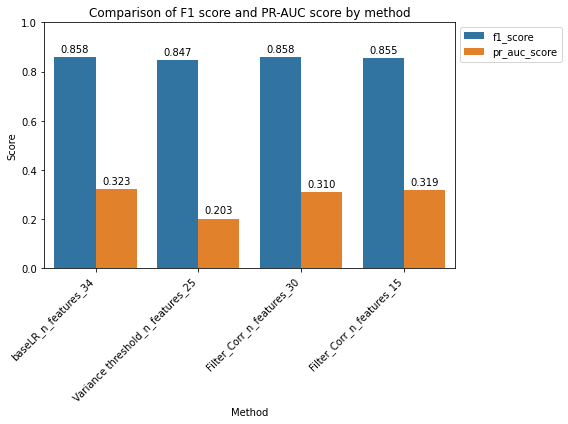

In [223]:
# evaluator.calculate_update_score(base_lr_model, method = 'Filter_Corr', selected_features = X_reduced.columns)
evaluator.calculate_update_score(base_lr_model, method = 'Filter_Corr', selected_features = corr_selected_cols)

evaluator.plot_scores()

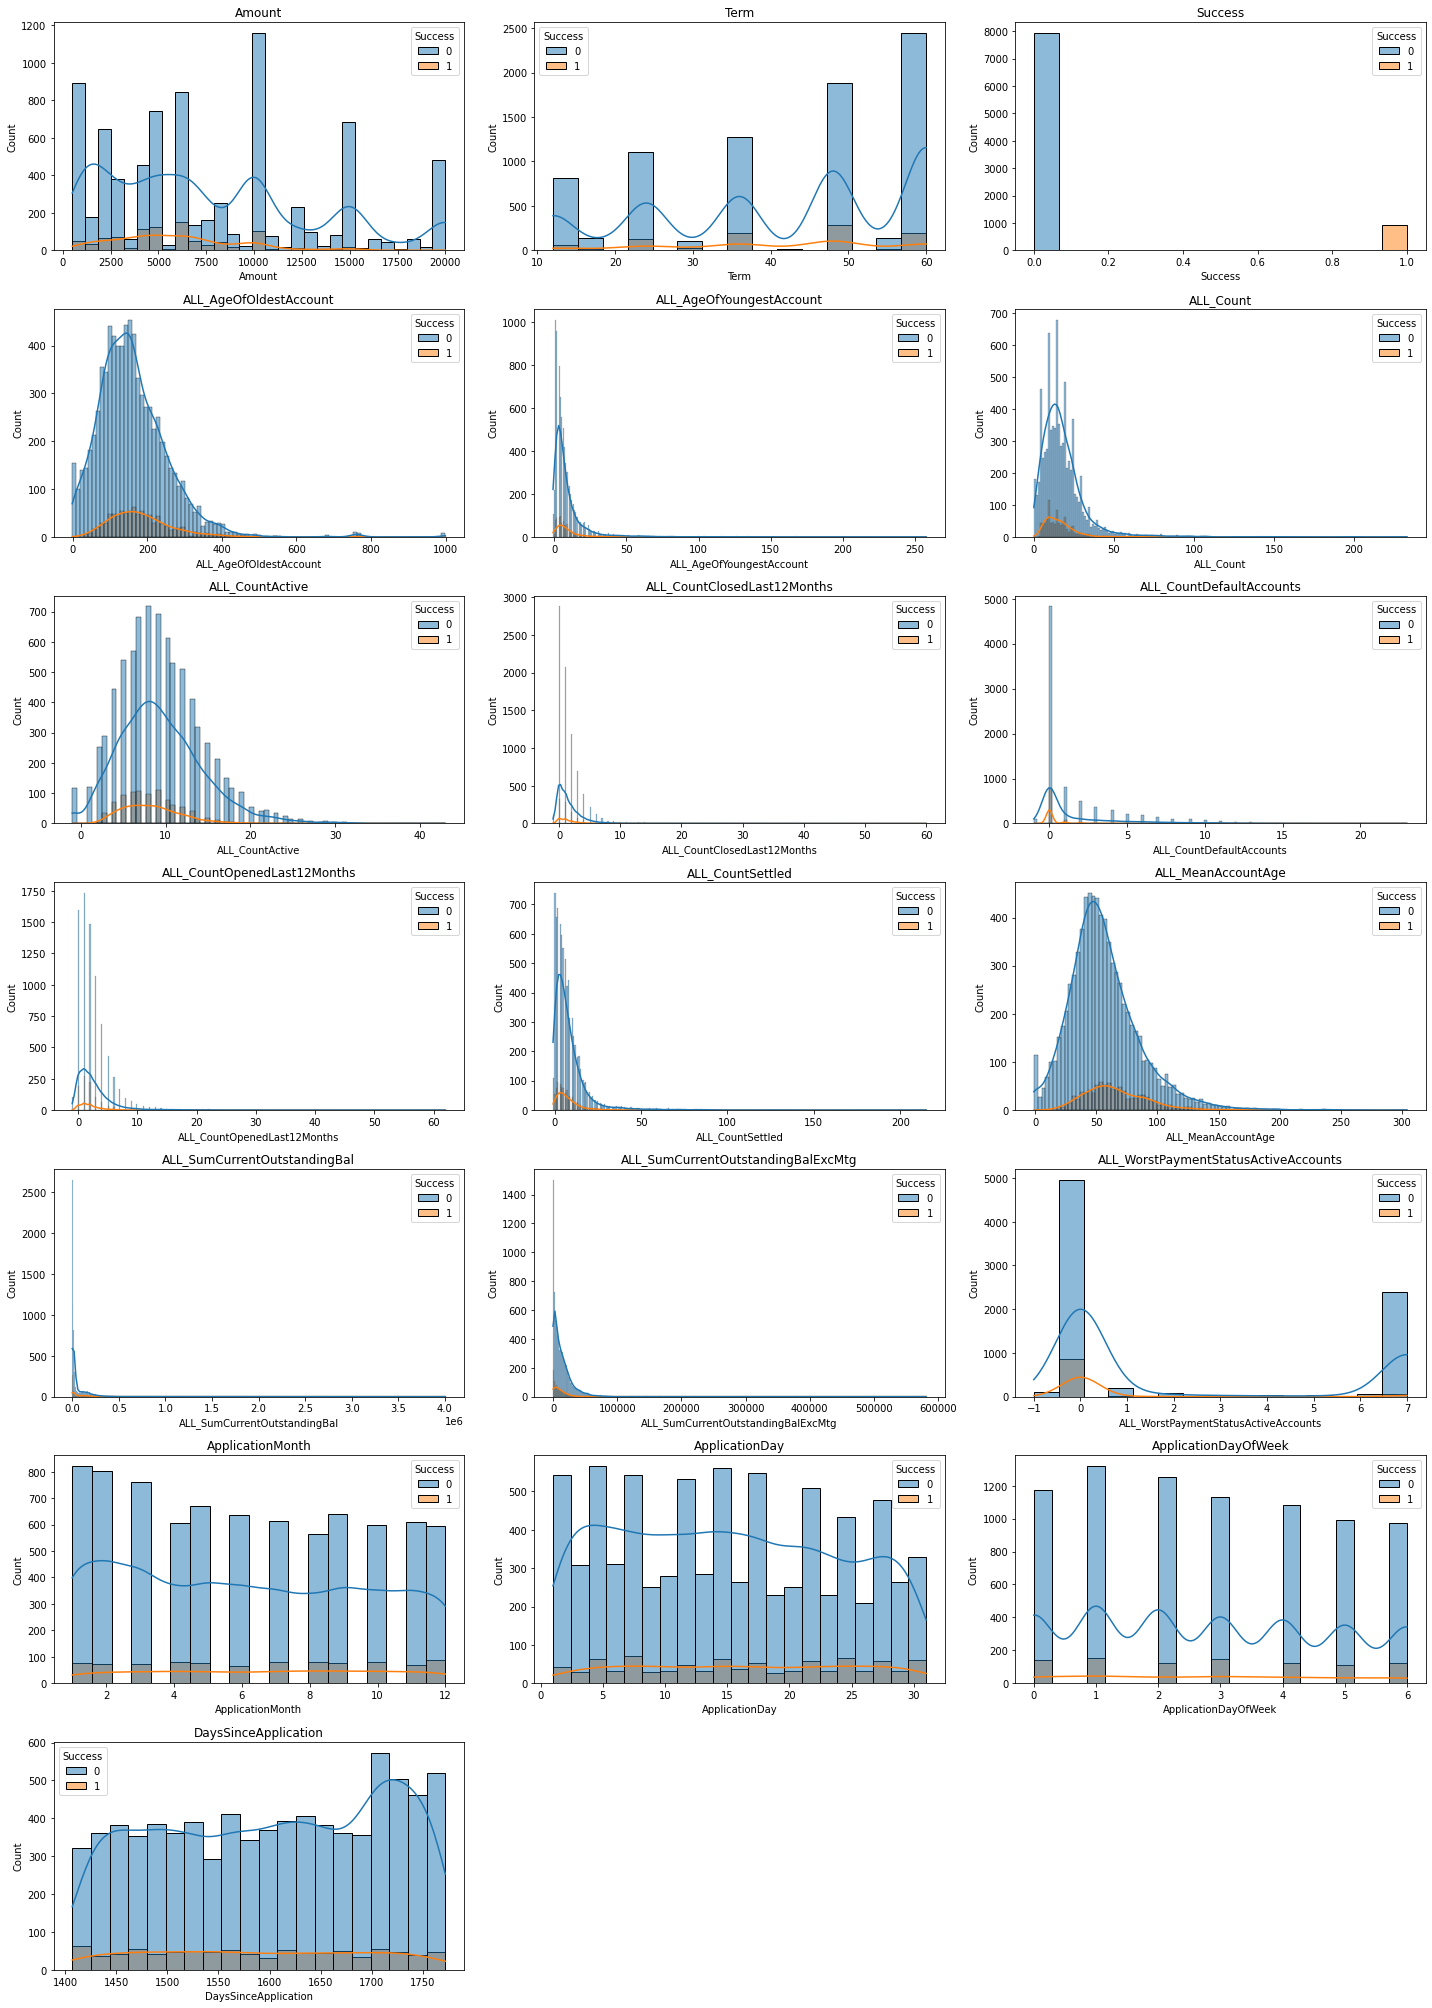

In [157]:
num_features = full_df.select_dtypes(include=['float64', 'int64']).columns

num_plots = len(num_features)
ncols = 3
nrows = (num_plots // ncols) + (num_plots % ncols > 0)

fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, nrows * 4))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.histplot(data = full_df, x = feature, hue = 'Success', kde = True, ax = axes[i])
    axes[i].set_title(feature)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 3-3. Filter Method - (2) Mutual Information

In [224]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [225]:
f1_score_list = []
pr_auc_score_list = []

In [226]:
len(X.columns)

34

In [227]:
for k in range(1, len(X.columns)+1):
    selector = SelectKBest(mutual_info_classif, k = k)
    selector.fit(X_train, y_train)

    kbest_X_train = selector.transform(X_train)
    kbest_X_test = selector.transform(X_test)

    base_lr_model.fit(kbest_X_train, y_train)
    kbest_y_pred = base_lr_model.predict(kbest_X_test)
    kbest_y_probs = base_lr_model.predict_proba(kbest_X_test)[:, 1]

    kbest_f1_score = round(f1_score(y_test, kbest_y_pred, average = 'weighted'), 3)
    kbest_pr_auc_score = round(average_precision_score(y_test, kbest_y_probs), 3)

    f1_score_list.append(kbest_f1_score)
    pr_auc_score_list.append(kbest_pr_auc_score)
    

/Users/minjoo/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/minjoo/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

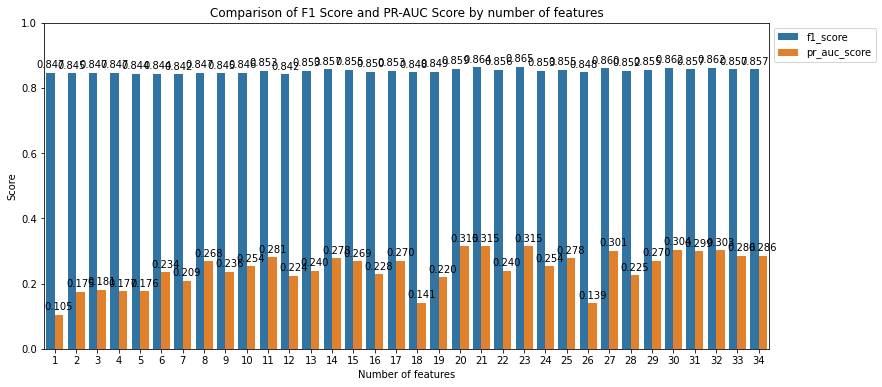

In [228]:
temp_df = pd.DataFrame({
    'number_features' : range(1,len(X.columns)+1),
    'f1_score' : f1_score_list,
    'pr_auc_score' : pr_auc_score_list
})

# Melt the DataFrame into long format
temp_df_long = temp_df.melt(id_vars='number_features', var_name='Metric', value_name='Score')

# Plot with Seaborn
plt.figure(figsize=(13, 6))
ax = sns.barplot(x='number_features', y='Score', hue='Metric', data= temp_df_long)
plt.title('Comparison of F1 Score and PR-AUC Score by number of features')
plt.ylabel('Score')
plt.xlabel('Number of features')
plt.ylim(0,1)
ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1))

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.show()

It seems like the more feature we use, the better peformance!
F1 score doesn't really change but pr-auc changes

In [233]:
selector = SelectKBest(mutual_info_classif, k=30)
selector.fit(X_train, y_train)

selected_feature_mask = selector.get_support()

mi_sel_features = X_train.columns[selected_feature_mask]

mi_sel_features

Index(['Amount', 'Term', 'ALL_AgeOfOldestAccount', 'ALL_AgeOfYoungestAccount',
       'ALL_Count', 'ALL_CountActive', 'ALL_CountClosedLast12Months',
       'ALL_CountDefaultAccounts', 'ALL_CountOpenedLast12Months',
       'ALL_CountSettled', 'ALL_MeanAccountAge',
       'ALL_SumCurrentOutstandingBal', 'ALL_SumCurrentOutstandingBalExcMtg',
       'ALL_WorstPaymentStatusActiveAccounts', 'ApplicationMonth',
       'ApplicationDay', 'DaysSinceApplication',
       'EmploymentType_Employed - full time',
       'EmploymentType_Employed - part time', 'EmploymentType_Retired',
       'Cluster_0', 'Cluster_1', 'Cluster_4', 'Cluster_5', 'Cluster_6',
       'Cluster_7', 'Cluster_8', 'Cluster_9', 'Cluster_10', 'Cluster_11'],
      dtype='object')

Filter_MI_n_features_30_f1_score :, 0.858
Filter_MI_n_features_30_pr_auc_score : 0.324


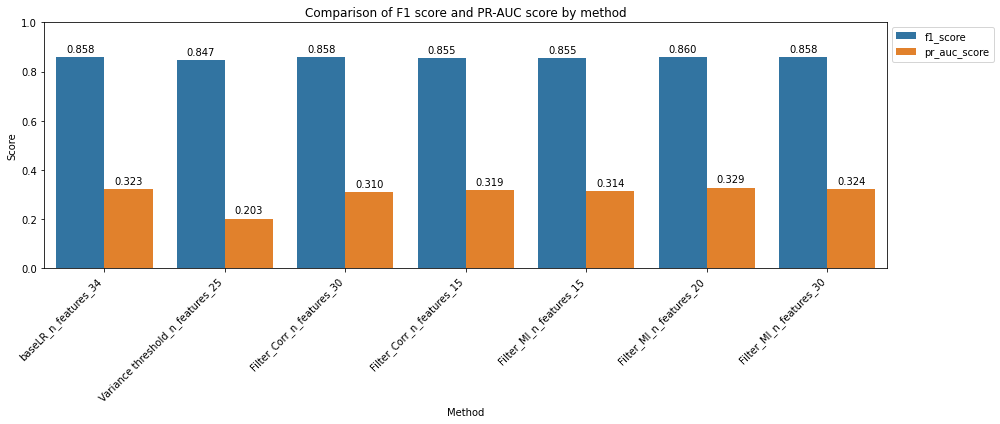

In [234]:
evaluator.calculate_update_score(base_lr_model, method = 'Filter_MI', selected_features = mi_sel_features)
evaluator.plot_scores()

## 3-4. Wrapper Methods - Recursive feature Elimination (RFE)
Calculate the featrue importnace

In [235]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, average_precision_score

In [236]:
# Define the model with class_weight for handling imbalance
# model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, class_weight='balanced', max_iter=500)
# model = GradientBoostingClassifier(max_depth = 5, random_state=42)

# Define cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scorers for weighted F1 and PR-AUC
weighted_f1_scorer = make_scorer(f1_score, average='weighted')
pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)

# Use RFECV to perform RFE with cross-validation
# We specify 'f1' as the scoring to optimize F1-score during feature selection
selector = RFECV(estimator=base_lr_model, step=1, cv=cv_strategy, scoring = weighted_f1_scorer, min_features_to_select=5)
selector.fit(X_train_scaled, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=LogisticRegression(max_iter=1000, random_state=42),
      min_features_to_select=5,
      scoring=make_scorer(f1_score, average=weighted))

In [240]:
selector.grid_scores_

/Users/minjoo/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.84574987, 0.84574987, 0.84701556, 0.84489705, 0.84599542],
       [0.84574987, 0.84574987, 0.84701556, 0.84560427, 0.84599542],
       [0.84539744, 0.84610203, 0.84631045, 0.84701556, 0.84599542],
       [0.84539744, 0.84709714, 0.84631045, 0.84764925, 0.84599542],
       [0.84877885, 0.85651815, 0.84756432, 0.85265776, 0.84882132],
       [0.85528564, 0.85452535, 0.84746721, 0.85359674, 0.85282605],
       [0.85487569, 0.85683683, 0.85068001, 0.85548581, 0.85641872],
       [0.85683683, 0.85860335, 0.85302513, 0.85292907, 0.85600713],
       [0.85641964, 0.85794887, 0.85262334, 0.85694796, 0.85559601],
       [0.85331674, 0.86009072, 0.85107844, 0.85548581, 0.85402102],
       [0.85331674, 0.86096422, 0.85068417, 0.85694796, 0.85518534],
       [0.85528564, 0.86245087, 0.84913176, 0.85442455, 0.8571556 ],
       [0.85683683, 0.86096422, 0.84913176, 0.85506569, 0.8567376 ],
       [0.85412212, 0.86052711, 0.84913176, 0.85652158, 0.8571556 ],
       [0.85528564, 0.85710212, 0.

Optimal number of features :  31
Selected Features: ['Amount', 'Term', 'ALL_AgeOfOldestAccount', 'ALL_AgeOfYoungestAccount', 'ALL_Count', 'ALL_CountActive', 'ALL_CountDefaultAccounts', 'ALL_CountOpenedLast12Months', 'ALL_CountSettled', 'ALL_MeanAccountAge', 'ALL_SumCurrentOutstandingBal', 'ALL_SumCurrentOutstandingBalExcMtg', 'ALL_WorstPaymentStatusActiveAccounts', 'ApplicationMonth', 'ApplicationDay', 'DaysSinceApplication', 'EmploymentType_Employed - full time', 'EmploymentType_Employed - part time', 'EmploymentType_Retired', 'EmploymentType_Self employed', 'Cluster_0', 'Cluster_1', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7', 'Cluster_8', 'Cluster_9', 'Cluster_10', 'Cluster_11']
Cross-validated Weighted F1 Score at optimal features 0.857


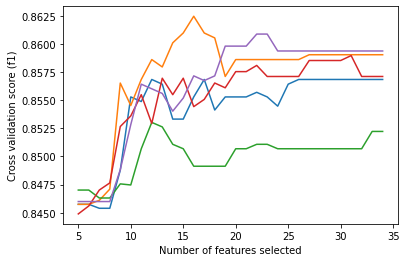

In [245]:
# Print selected feature names
selected_features = X_train.columns[selector.support_]
optimal_n_features = selector.n_features_
optimal_score = max(selector.cv_results_['mean_test_score'])
print("Optimal number of features : ", optimal_n_features)
print("Selected Features:", selected_features.to_list())
print("Cross-validated Weighted F1 Score at optimal features", round(optimal_score,3))

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (f1)")
plt.plot(
    range(5, len(selector.grid_scores_) + 5, 1),
    selector.grid_scores_,
)
plt.show()

In [243]:
##############################################################
# Transform X to keep only the selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Re-fit the model on the training set with selected features
base_lr_model.fit(X_train_selected, y_train)

# Predict probabilities on the test set to adjust the threshold
y_probs = base_lr_model.predict_proba(X_test_selected)[:, 1]
y_pred = base_lr_model.predict(X_test_selected)

# Try different thresholds to optimize F1 score
pr_auc = average_precision_score(y_test, y_probs)
rfe_pr_auc = pr_auc

print('**********************************************')
print(f"PR-AUC on test set: {round(pr_auc, 3)}\n")

for threshold in [0.2, 0.3, 0.4, 0.5, 0.6]:
    y_pred = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    print(f"F1 score at threshold {threshold}: {round(f1, 3)}")

# Apply threshold of 0.4 to obtain binary predictions
y_pred = (y_probs >= 0.4).astype(int)
# Calculate F1 score with the adjusted threshold
rfe_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nF1 score with threshold 0.4: {round(rfe_f1, 3)}")

**********************************************
PR-AUC on test set: 0.324

F1 score at threshold 0.2: 0.847
F1 score at threshold 0.3: 0.867
F1 score at threshold 0.4: 0.866
F1 score at threshold 0.5: 0.858
F1 score at threshold 0.6: 0.854

F1 score with threshold 0.4: 0.866


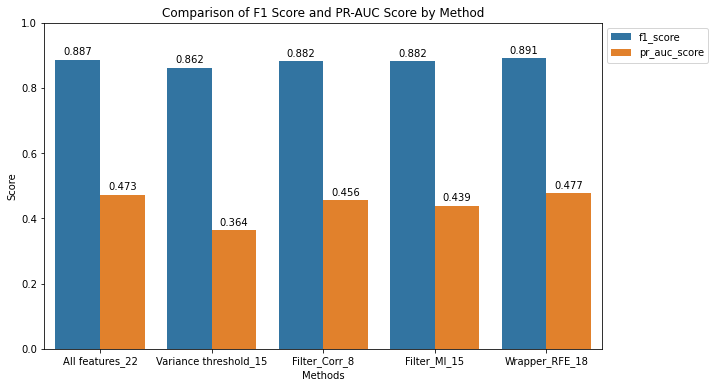

In [209]:
graph_df = pd.DataFrame({
    'methods' : ['All features_22', 'Variance threshold_15', 'Filter_Corr_8', 'Filter_MI_15', 'Wrapper_RFE_18'],
    'f1_score' : [base_f1_score, var_f1_score, corr_f1_score, mi_f1_score, rfe_f1],
    'pr_auc_score' : [base_pr_auc_score, var_pr_auc_score, corr_pr_auc_score, mi_pr_auc_score, rfe_pr_auc]
})

# Melt the DataFrame into long format
graph_df_long = graph_df.melt(id_vars='methods', var_name='Metric', value_name='Score')

# Plot with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='methods', y='Score', hue='Metric', data=graph_df_long)
plt.title('Comparison of F1 Score and PR-AUC Score by Method')
plt.ylabel('Score')
plt.xlabel('Methods')
ax.set_ylim(0,1)
ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1))

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.show()

## 3-5. Embedded Methods (Feature Importance)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import Lasso

### Lasso

In [130]:
# Regularization (Lasso)

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, average_precision_score

# Assuming you have X_train_scaled, y_train, X_test_scaled, and y_test defined

# Set up the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)  # Using Lasso (L1 penalty)

# Custom scorers for weighted F1 and PR-AUC
weighted_f1_scorer = make_scorer(f1_score, average='weighted')
pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)

# Baseline Model: Evaluate using all features (no feature selection) on training data with cross-validation
weighted_f1_all_features = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=weighted_f1_scorer).mean()
pr_auc_all_features = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=pr_auc_scorer).mean()
print(f"All features - Cross-Validated Weighted F1 Score: {weighted_f1_all_features}, Cross-Validated PR-AUC: {pr_auc_all_features}")

# Fit Lasso model on the full training data to get feature coefficients
model.fit(X_train_scaled, y_train)
lasso_coefficients = model.coef_[0]

# Select features with non-zero coefficients (features selected by Lasso)
selected_features_lasso = [feature_names[i] for i, coef in enumerate(lasso_coefficients) if coef != 0]
print('')
print("Selected features by Lasso:", selected_features_lasso)

# Final model training and testing using Lasso-selected features
X_train_lasso = X_train_scaled[:, [feature_names.index(f) for f in selected_features_lasso]]
X_test_lasso = X_test_scaled[:, [feature_names.index(f) for f in selected_features_lasso]]

# Re-evaluate model using only the Lasso-selected features
weighted_f1_lasso = cross_val_score(model, X_train_lasso, y_train, cv=cv, scoring=weighted_f1_scorer).mean()
pr_auc_lasso = cross_val_score(model, X_train_lasso, y_train, cv=cv, scoring=pr_auc_scorer).mean()
print(f"Lasso-selected features - Cross-Validated Weighted F1 Score: {weighted_f1_lasso}, Cross-Validated PR-AUC: {pr_auc_lasso}")

# ---------- Final Evaluation on Test Set with Lasso-selected features ----------

# Fit the final Lasso model on the training data with Lasso-selected features
model.fit(X_train_lasso, y_train)

# Make predictions on the test set
y_pred_test_lasso = model.predict(X_test_lasso)
y_proba_test_lasso = model.predict_proba(X_test_lasso)[:, 1]

# Calculate F1 score and PR-AUC on the test set
f1_test_lasso = f1_score(y_test, y_pred_test_lasso, average='weighted')
pr_auc_test_lasso = average_precision_score(y_test, y_proba_test_lasso)

print(f"Lasso-selected features - Test Weighted F1 Score: {f1_test_lasso}, Test PR-AUC: {pr_auc_test_lasso}")

All features - Cross-Validated Weighted F1 Score: 0.8555366389763266, Cross-Validated PR-AUC: 0.3281901741934848
Selected features by Lasso: ['Amount', 'Term', 'ALL_AgeOfOldestAccount', 'ALL_AgeOfYoungestAccount', 'ALL_Count', 'ALL_CountActive', 'ALL_CountClosedLast12Months', 'ALL_CountDefaultAccounts', 'ALL_CountOpenedLast12Months', 'ALL_CountSettled', 'ALL_MeanAccountAge', 'ALL_SumCurrentOutstandingBal', 'ALL_SumCurrentOutstandingBalExcMtg', 'ALL_WorstPaymentStatusActiveAccounts', 'ApplicationMonth', 'ApplicationDay', 'ApplicationDayOfWeek', 'EmploymentType_Employed - full time', 'EmploymentType_Retired', 'EmploymentType_Self employed', 'LoanPurposeCluster']
Lasso-selected features - Cross-Validated Weighted F1 Score: 0.8555366389763266, Cross-Validated PR-AUC: 0.32812591516787554
Lasso-selected features - Test Weighted F1 Score: 0.8628156066395125, Test PR-AUC: 0.3369057728639233


### Feature Importances

In [210]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Set up the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = GradientBoostingClassifier(max_depth = 5, random_state=42)

# List to store feature importances from each fold
feature_importances = []

# For each fold, train the model and extract feature importance
for train_idx, val_idx in cv.split(X_train_scaled, y_train):
    # Split training and validation data
    X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    # Train the model
    model.fit(X_fold_train, y_fold_train)
    
    # Store feature importances from this fold
    feature_importances.append(model.feature_importances_)

# Calculate the mean feature importance across all folds
mean_importances = np.mean(feature_importances, axis=0)

# Organize feature importances into a DataFrame for better readability
feature_names = X.columns.to_list()
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_importances})


# Custom scorer
weighted_f1_scorer = make_scorer(f1_score, average='weighted')
pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)

# Baseline Model: Evaluate using all features (no feature selection) on training data with cross-validation
weighted_f1_all_features = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=weighted_f1_scorer).mean()
pr_auc_all_features = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=pr_auc_scorer).mean()
print(f"All features - Cross-Validated Weighted F1 Score: {weighted_f1_all_features}, Cross-Validated PR-AUC: {pr_auc_all_features}")


# Method 1: Select the top N features (e.g., top 10 features)
top_n = 10
selected_features_top_n = feature_importances_df.sort_values(by='Importance', ascending=False).head(top_n)
top_n_features = selected_features_top_n['Feature'].values
print("Top N Features:\n", selected_features_top_n)

# Re-train model using only the top N features and evaluate PR-AUC and weighted F1 score
X_train_top_n = X_train_scaled[:, [feature_names.index(f) for f in top_n_features]]
weighted_f1_top_n = cross_val_score(model, X_train_top_n, y_train, cv=cv, scoring=weighted_f1_scorer).mean()
pr_auc_top_n = cross_val_score(model, X_train_top_n, y_train, cv=cv, scoring=pr_auc_scorer).mean()
print(f"Top {top_n} features - Weighted F1 Score: {weighted_f1_top_n}, PR-AUC: {pr_auc_top_n}")

# Method 2: Select features above the 80th percentile threshold
percentile_threshold = 80
threshold = np.percentile(mean_importances, percentile_threshold)
selected_features_percentile = feature_importances_df[feature_importances_df['Importance'] > threshold]
percentile_features = selected_features_percentile['Feature'].values
print(f"\nFeatures above {percentile_threshold}th percentile:\n", selected_features_percentile)

# Re-train model using only the features above the threshold and evaluate PR-AUC and weighted F1 score
X_train_percentile = X_train_scaled[:, [feature_names.index(f) for f in percentile_features]]
weighted_f1_percentile = cross_val_score(model, X_train_percentile, y_train, cv=cv, scoring=weighted_f1_scorer).mean()
pr_auc_percentile = cross_val_score(model, X_train_percentile, y_train, cv=cv, scoring=pr_auc_scorer).mean()
print(f"Features above {percentile_threshold}th percentile - Weighted F1 Score: {weighted_f1_percentile}, PR-AUC: {pr_auc_percentile}")

All features - Cross-Validated Weighted F1 Score: 0.8783642815642979, Cross-Validated PR-AUC: 0.42138191950116033
Top N Features:
                                  Feature  Importance
0                                 Amount    0.166985
12    ALL_SumCurrentOutstandingBalExcMtg    0.152999
10                    ALL_MeanAccountAge    0.140683
11          ALL_SumCurrentOutstandingBal    0.118118
13  ALL_WorstPaymentStatusActiveAccounts    0.083296
2                 ALL_AgeOfOldestAccount    0.051106
17                  DaysSinceApplication    0.046076
5                        ALL_CountActive    0.044798
4                              ALL_Count    0.038562
15                        ApplicationDay    0.030244
Top 10 features - Weighted F1 Score: 0.8768684044734956, PR-AUC: 0.41322045079161523

Features above 80th percentile:
                                  Feature  Importance
0                                 Amount    0.166985
10                    ALL_MeanAccountAge    0.140683
11      

In [211]:
# ---------- Final Evaluation on Test Set ----------

# Baseline Model: Evaluate using all features on the test set
model.fit(X_train_scaled, y_train)  # Train on full training data with all features
y_pred_test_all = model.predict(X_test_scaled)
y_proba_test_all = model.predict_proba(X_test_scaled)[:, 1]
f1_test_all = f1_score(y_test, y_pred_test_all, average='weighted')
pr_auc_test_all = average_precision_score(y_test, y_proba_test_all)
print(f"All features - Test Weighted F1 Score: {f1_test_all}, Test PR-AUC: {pr_auc_test_all}")

# Final model training and testing using top N features
X_train_top_n_final = X_train_scaled[:, [feature_names.index(f) for f in top_n_features]]
X_test_top_n = X_test_scaled[:, [feature_names.index(f) for f in top_n_features]]

# Fit the model on the selected features from the training set
model.fit(X_train_top_n_final, y_train)

# Make predictions on the test set
y_pred_test_top_n = model.predict(X_test_top_n)
y_proba_test_top_n = model.predict_proba(X_test_top_n)[:, 1]

# Calculate F1 score and PR-AUC on the test set
f1_test_top_n = f1_score(y_test, y_pred_test_top_n, average='weighted')
pr_auc_test_top_n = average_precision_score(y_test, y_proba_test_top_n)

print(f"Top {top_n} features - Test Weighted F1 Score: {f1_test_top_n}, Test PR-AUC: {pr_auc_test_top_n}")

# Final model training and testing using percentile-based features
X_train_percentile_final = X_train_scaled[:, [feature_names.index(f) for f in percentile_features]]
X_test_percentile = X_test_scaled[:, [feature_names.index(f) for f in percentile_features]]

# Fit the model on the selected features from the training set
model.fit(X_train_percentile_final, y_train)

# Make predictions on the test set
y_pred_test_percentile = model.predict(X_test_percentile)
y_proba_test_percentile = model.predict_proba(X_test_percentile)[:, 1]

# Calculate F1 score and PR-AUC on the test set
f1_test_percentile = f1_score(y_test, y_pred_test_percentile, average='weighted')
pr_auc_test_percentile = average_precision_score(y_test, y_proba_test_percentile)

print(f"Features above {percentile_threshold}th percentile - Test Weighted F1 Score: {f1_test_percentile}, Test PR-AUC: {pr_auc_test_percentile}")

All features - Test Weighted F1 Score: 0.8883270980019898, Test PR-AUC: 0.47675113195204877
Top 10 features - Test Weighted F1 Score: 0.881339556603002, Test PR-AUC: 0.430222192789161
Features above 80th percentile - Test Weighted F1 Score: 0.8765328576329638, Test PR-AUC: 0.41014361242232134


## 3-6. PCA (Dimentionality Reduction) ???????

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X)

In [ ]:
# maybe month day 는 categorical 로 변경?

# 스케일러 2가지로 실험해보기
- standard / minmax

why ??

# 4. Modeling & Evaluation

Try all the different models
and also find the best threshold

KNN???
CatBoost
GBM
XGBoost
Logistic Regression
Decision trees
Random Forests

In [246]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [256]:
def evaluate_model(model, x_test, y_test, desired_precision):

    # predict test data
    y_pred = model.predict(x_test)

    # calculate accuracy, precision, recall, f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average = 'weighted')

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    clf_report = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True)).transpose()
    clf_report= clf_report.round(2)

    # Predict probability
    y_prob_test = model.predict_proba(X_test)[:,1]
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_test)
    pr_auc = metrics.auc(recall, precision)
    # print('PR-AUC-score : ', pr_auc)


    # desired_precision = 0.8
    for p,r,t in zip(precision, recall, thresholds):
        if p >= desired_precision :
            print(f"Threshold: {t:.2f}, Precision: {p:.2f}, Recall: {r:.2f}")
            selected_threshold = t
            y_pred_adjusted = (y_prob_test >= selected_threshold).astype(int)
            from sklearn.metrics import precision_score, recall_score

            # Calculate precision and recall at the adjusted threshold
            precision_adj = precision_score(y_test, y_pred_adjusted)
            recall_adj = recall_score(y_test, y_pred_adjusted)

            print(f"Adjusted Precision: {precision_adj:.2f}, Adjusted Recall: {recall_adj:.2f}")
            break

    # Plot the Precision-Recall curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # print('Accuracy :', acc)
    print('F1 Score :', round(f1,3))
    print(f'PR-AUC-score : {pr_auc:.3f}')
    print('Precision :', round(prec,3))
    print('Recall :', round(rec,3))
    print('--------------------------------')
    # print('AUC-score :', auc)
    print('Confusion Matrix\n :', cm)
    print('--------------------------------')
    print('Classification Report\n', clf_report)


    # return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
    #         'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm, 'report' : clf_report}

### Logistic Regression

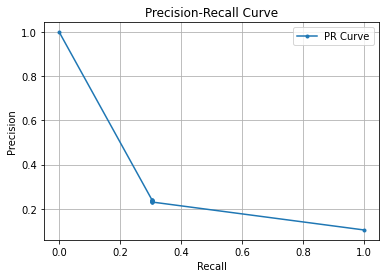

F1 Score : 0.858
PR-AUC-score : 0.305
Precision : 0.524
Recall : 0.06
--------------------------------
Confusion Matrix
 : [[1576   10]
 [ 173   11]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    0.99      0.95   1586.0
1                  0.52    0.06      0.11    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.71    0.53      0.53   1770.0
weighted avg       0.86    0.90      0.86   1770.0


In [257]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train_scaled, y_train)

# Evaluate
evaluate_model(lr_clf, X_test_scaled, y_test, 0.8)

In [258]:
lr_clf = LogisticRegression(solver = 'liblinear')
param_distributions = {'C' : uniform(0.01, 10),
                       'penalty' : ['l1', 'l2']}

lr_clf_cv = RandomizedSearchCV(lr_clf, param_distributions, n_iter = 100, scoring = 'average_precision', cv = 5, random_state = 42, n_jobs =-1)
lr_clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa44bd069d0>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='average_precision')

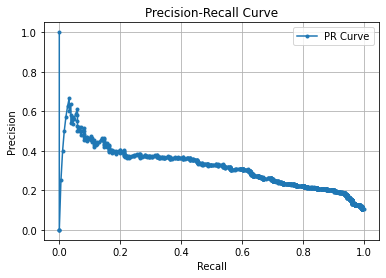

F1 Score : 0.858
PR-AUC-score : 0.321
Precision : 0.5
Recall : 0.06
--------------------------------
Confusion Matrix
 : [[1575   11]
 [ 173   11]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    0.99      0.94   1586.0
1                  0.50    0.06      0.11    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.70    0.53      0.53   1770.0
weighted avg       0.86    0.90      0.86   1770.0


In [259]:
# Evaluate
evaluate_model(lr_clf_cv, X_test, y_test, 0.7)

### KNN

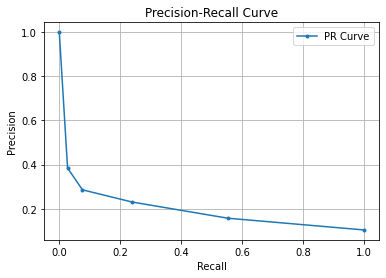

F1 Score : 0.853
PR-AUC-score : 0.196
Precision : 0.286
Recall : 0.076
--------------------------------
Confusion Matrix
 : [[1551   35]
 [ 170   14]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    0.98      0.94  1586.00
1                  0.29    0.08      0.12   184.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.59    0.53      0.53  1770.00
weighted avg       0.84    0.88      0.85  1770.00


In [260]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Evaluate
evaluate_model(knn_clf, X_test, y_test, 0.8)

In [264]:
knn_clf_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'distance'}

In [262]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
param_distributions = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_clf_cv = RandomizedSearchCV(knn_clf, param_distributions, n_iter = 100, scoring = 'average_precision', cv = 5, random_state = 42, n_jobs =-1)

knn_clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa44be7ac50>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='average_precision')

Threshold: 0.65, Precision: 1.00, Recall: 0.01
Adjusted Precision: 1.00, Adjusted Recall: 0.01


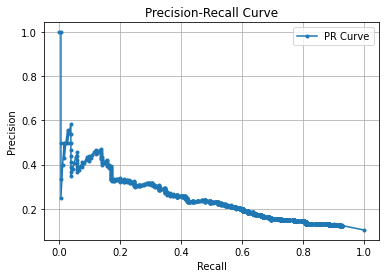

F1 Score : 0.85
PR-AUC-score : 0.248
Precision : 0.5
Recall : 0.016
--------------------------------
Confusion Matrix
 : [[1583    3]
 [ 181    3]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    1.00      0.95   1586.0
1                  0.50    0.02      0.03    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.70    0.51      0.49   1770.0
weighted avg       0.86    0.90      0.85   1770.0


In [263]:
# Evaluate
evaluate_model(knn_clf_cv, X_test, y_test, 0.7)

### Decision Tree

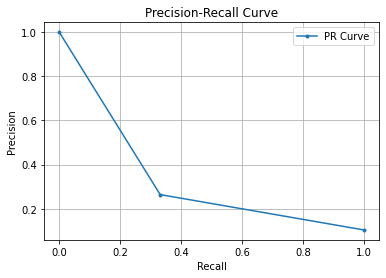

F1 Score : 0.843
PR-AUC-score : 0.333
Precision : 0.264
Recall : 0.332
--------------------------------
Confusion Matrix
 : [[1416  170]
 [ 123   61]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.92    0.89      0.91  1586.00
1                  0.26    0.33      0.29   184.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.59    0.61      0.60  1770.00
weighted avg       0.85    0.83      0.84  1770.00


In [265]:
from sklearn import tree

# Decision Tree
dt_clf = tree.DecisionTreeClassifier(random_state= 42)
dt_clf.fit(X_train, y_train)

# Evaluate model
evaluate_model(dt_clf, X_test, y_test, 0.8)

In [266]:
from sklearn import tree

# Decision Tree
dt_clf = tree.DecisionTreeClassifier(random_state= 42)
param_distributions = {'max_depth' : randint(3,10),
                       'min_samples_split' : randint(2,20),
                       'min_samples_leaf' : randint(1,10)}

dt_clf_cv = RandomizedSearchCV(dt_clf, param_distributions, n_iter = 100, scoring = 'average_precision', cv = 5, random_state = 42, n_jobs =-1)
dt_clf_cv.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa459e59e50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa47a39c2d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa45be12810>},
                   random_state=42, scoring='average_precision')

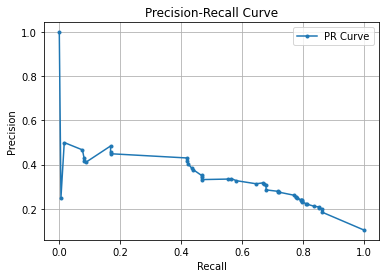

F1 Score : 0.859
PR-AUC-score : 0.341
Precision : 0.429
Recall : 0.082
--------------------------------
Confusion Matrix
 : [[1566   20]
 [ 169   15]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    0.99      0.94  1586.00
1                  0.43    0.08      0.14   184.00
accuracy           0.89    0.89      0.89     0.89
macro avg          0.67    0.53      0.54  1770.00
weighted avg       0.85    0.89      0.86  1770.00


In [267]:
# Evaluate model
evaluate_model(dt_clf_cv, X_test, y_test, 0.8)

### Random Forest

Threshold: 0.53, Precision: 0.93, Recall: 0.07
Adjusted Precision: 0.93, Adjusted Recall: 0.07


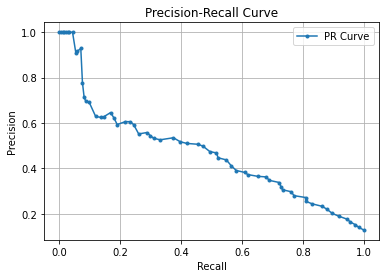

F1 Score : 0.864
PR-AUC-score : 0.464
Precision : 0.714
Recall : 0.082
--------------------------------
Confusion Matrix
 : [[1580    6]
 [ 169   15]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    1.00      0.95   1586.0
1                  0.71    0.08      0.15    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.81    0.54      0.55   1770.0
weighted avg       0.88    0.90      0.86   1770.0


In [268]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

# Evaluate Model
evaluate_model(rf_clf, X_test, y_test, 0.8)

In [269]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf_clf = RandomForestClassifier(random_state=0)
param_distributions = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf_clf_cv = RandomizedSearchCV(rf_clf, param_distributions, n_iter=100, scoring='average_precision', cv=5, random_state=42, n_jobs=-1)
rf_clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa4656f2750>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa44bedb990>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa44c729b10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa48e110a10>},
                   random_state=42, scoring='average_precision')

Threshold: 0.43, Precision: 0.71, Recall: 0.09
Adjusted Precision: 0.71, Adjusted Recall: 0.09


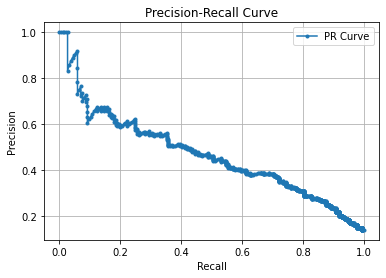

F1 Score : 0.854
PR-AUC-score : 0.469
Precision : 1.0
Recall : 0.027
--------------------------------
Confusion Matrix
 : [[1586    0]
 [ 179    5]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    1.00      0.95   1586.0
1                  1.00    0.03      0.05    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.95    0.51      0.50   1770.0
weighted avg       0.91    0.90      0.85   1770.0


In [270]:
# Evaluate Model
evaluate_model(rf_clf_cv, X_test, y_test, 0.7)

### GBM

In [271]:
from sklearn.ensemble import GradientBoostingClassifier

# Building Random Forest model 
gbm_clf = GradientBoostingClassifier()
param_distributions = {
    'learning_rate': uniform(0.01, 0.29),
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10)
}

gbm_clf_cv = RandomizedSearchCV(gbm_clf, param_distributions, n_iter = 100, scoring = 'average_precision', cv = 5, random_state = 42, n_jobs =-1)
gbm_clf_cv.fit(X_train, y_train)

In [ ]:
88 47

Threshold: 0.57, Precision: 0.70, Recall: 0.17
Adjusted Precision: 0.70, Adjusted Recall: 0.17


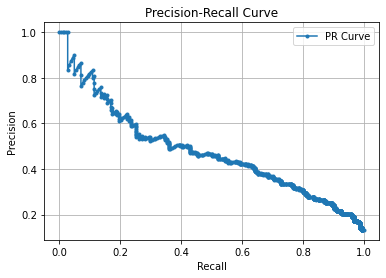

PR-AUC-score :  0.4786932412774965
Precision : 0.6307692307692307
Recall : 0.22282608695652173
F1 Score : 0.8848099844955585
--------------------------------
Confusion Matrix
 : [[1562   24]
 [ 143   41]]
--------------------------------
Classification Report
               precision    recall  f1-score     support
0              0.916129  0.984868  0.949256  1586.00000
1              0.630769  0.222826  0.329317   184.00000
accuracy       0.905650  0.905650  0.905650     0.90565
macro avg      0.773449  0.603847  0.639286  1770.00000
weighted avg   0.886465  0.905650  0.884810  1770.00000


In [103]:
# Evaluate Model
evaluate_model(gbm_clf_cv, X_test, y_test, 0.7)

### CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, average_precision_score

# Initialize CatBoost model
cbc = CatBoostClassifier(depth=5, random_state=42, verbose=0)  # Set `verbose=0` to suppress output

# Train the model
cbc.fit(X_train, y_train)

# Make predictions
y_pred = cbc.predict(X_test)
y_probs = cbc.predict_proba(X_test)[:, 1]

# Evaluate using F1 score and PR-AUC
base_f1_score = round(f1_score(y_test, y_pred, average='weighted'), 3)
base_pr_auc_score = round(average_precision_score(y_test, y_probs), 3)

print('CatBoost model f1 score:', base_f1_score)
print('CatBoost model pr_auc_score:', base_pr_auc_score)

### XGBoost

Threshold: 0.74, Precision: 0.71, Recall: 0.17
Adjusted Precision: 0.71, Adjusted Recall: 0.17


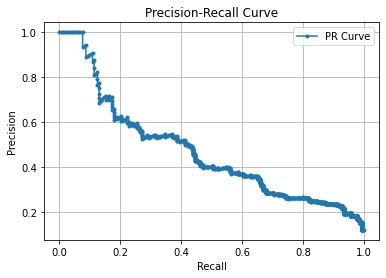

PR-AUC-score :  0.46981019911101685
Precision : 0.5321100917431193
Recall : 0.31521739130434784
F1 Score : 0.8883562774143842
--------------------------------
Confusion Matrix
 : [[1535   51]
 [ 126   58]]
--------------------------------
Classification Report
               precision    recall  f1-score  support
0              0.924142  0.967844  0.945488   1586.0
1              0.532110  0.315217  0.395904    184.0
accuracy       0.900000  0.900000  0.900000      0.9
macro avg      0.728126  0.641531  0.670696   1770.0
weighted avg   0.883388  0.900000  0.888356   1770.0


In [106]:
from xgboost import XGBClassifier

# Building Random Forest model 
xgb_clf = XGBClassifier()
# (n_estimators= 100, max_depth = 1, learning_rate= 1.0, random_state=0)
xgb_clf.fit(X_train, y_train)

# Evaluate Model
evaluate_model(xgb_clf, X_test, y_test, 0.7)

In [112]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 300),            # Randomly choose values between 50 and 300
    'learning_rate': uniform(0.01, 0.3),         # Uniform distribution from 0.01 to 0.3
    'max_depth': randint(3, 10),                 # Randomly choose values between 3 and 10
    'min_child_weight': randint(1, 10),          # Randomly choose values between 1 and 10
    'gamma': uniform(0, 0.5),                    # Uniform distribution from 0 to 0.5
    'subsample': uniform(0.5, 0.5),              # Uniform distribution from 0.5 to 1.0
    'colsample_bytree': uniform(0.3, 0.7),       # Uniform distribution from 0.3 to 1.0
    # 'scale_pos_weight': [scale_pos_weight]       # Use calculated scale_pos_weight for class imbalance
}

# Initialize the XGBClassifier
# xgb_clf = XGBClassifier()

# Set up RandomizedSearchCV with PR-AUC as the scoring metric
xgb_clf_cv = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=param_distributions,
    n_iter=100,
    scoring='average_precision',  # Use PR-AUC (average precision) as the scoring metric
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
xgb_clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f81480fd730>,
             

Threshold: 0.61, Precision: 0.82, Recall: 0.12
Adjusted Precision: 0.82, Adjusted Recall: 0.12


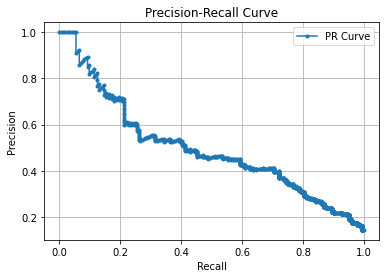

PR-AUC-score :  0.49745617029909184
Precision : 0.6086956521739131
Recall : 0.22826086956521738
F1 Score : 0.8844899730287982
--------------------------------
Confusion Matrix
 : [[1559   27]
 [ 142   42]]
--------------------------------
Classification Report
               precision    recall  f1-score     support
0              0.916520  0.982976  0.948585  1586.00000
1              0.608696  0.228261  0.332016   184.00000
accuracy       0.904520  0.904520  0.904520     0.90452
macro avg      0.762608  0.605618  0.640301  1770.00000
weighted avg   0.884520  0.904520  0.884490  1770.00000


In [114]:
# Evaluate Model
evaluate_model(xgb_clf_cv, X_test, y_test, desired_precision= 0.8)

1. pr-auc score, f1 score 어느정도 되는 모델을 찾기 (GridSearchCV)
2. threshold 조정하여 precision-recall balance

In our case, In lending scenarios, in my personal opinion, i believe the precision is slightly more important to avoid the risk of bad loans. but i am not sure about what your team and organization aims for. if retaining potential customer is a concern, a high recall could also be a valuable option. 
but yea, since i don't really know about the goal, I'd definitely look at F1 score for having safe precision and recall balance.

High precision -> conservative, it's very selective about which applications it predics as successful, but it misses many actual successes.
High precision is valuable if avoiding bad loans is a priority
What's the priority
	•	If the priority is risk minimization (avoiding defaults and reducing financial loss), then a higher precision and lower recall can be justifiable. A conservative threshold (like 0.90) helps ensure that only highly likely successful applicants are approved, aligning with a risk-averse approach.
	•	If the goal includes capturing more successful applicants (e.g., maximizing the loan portfolio’s profitability and retaining customers), then a recall of 0.17 is too low. In this case, you’d want a threshold that balances recall and precision more effectively, as rejecting too many successful applicants could hinder growth.


precision 0.82 : 
recall 0.17 : 

